<h3>IPL Score Prediction Model</h3>

In [88]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [89]:
ipl_df = pd.read_csv('ipl_data.csv')
print('File has been loaded suceesfully', ipl_df.shape)


File has been loaded suceesfully (76014, 15)


<h4>Exploratory Data Analysis - EDA</h4>

In [90]:
# Displays Top 10 entries in the dataset

ipl_df.head(10)

mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
5    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
6    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
7    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
8    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
9    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   
5  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.5   
6  Royal Challengers Bangalore  BB McCullum  P Kumar     3        0    0.6   
7  Royal Challengers Bangalore  BB McCullum   Z Khan     3        0    1.1   
8  Royal Challengers Bangalore  BB McCullum   Z Khan     7        0    1.2   
9  Royal Challengers Bangalore  BB McCullum   Z Khan    11        0    1.3   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0            0    222  
1            1               0        0            0    222  
2            2               0        0            0    222  
3            2               0        0            0    222  
4            2               0        0            0    222  
5            2               0        0            0    222  
6            3               0        0            0    222  
7            3               0        0            0    222  
8            7               0        4            0    222  
9           11               0        8            0    222

In [91]:
# Return dtype, count and null/not null info in the dataset

ipl_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [92]:
# Returns number of all unique values in the dataset

ipl_df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

Text(0.5, 1.0, 'Wickets Distribution')

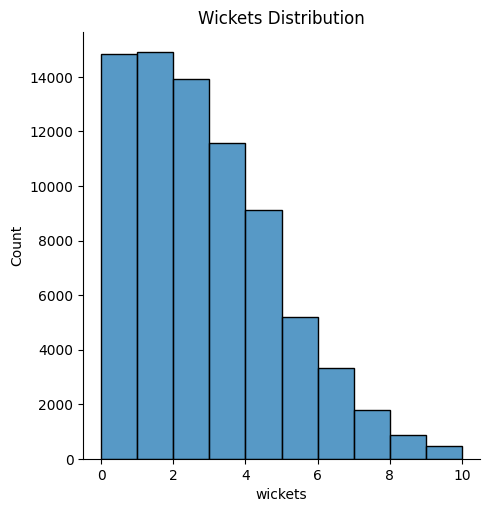

In [93]:
# Wickets Distribution (Using Seaborn)

sns.displot(ipl_df['wickets'], kde = False, bins = 10)
plt.title('Wickets Distribution')

Text(0.5, 1.0, 'Runs Distribution')

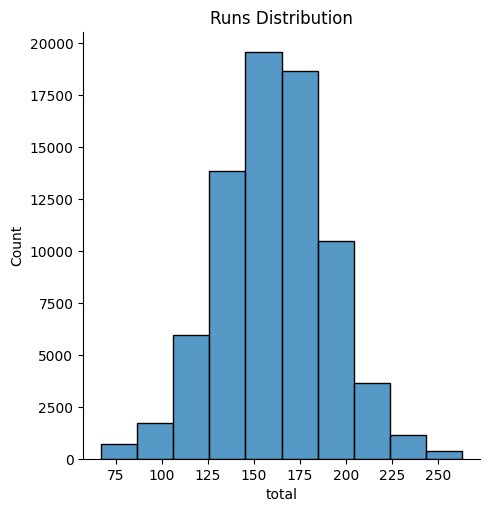

In [94]:
# Runs Distribution 

sns.displot(ipl_df['total'], kde = False, bins = 10)
plt.title('Runs Distribution')

<h5>Removing Irrelevant Data</h5>

In [95]:
# Displays all the columns of the dataset

ipl_df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [96]:
# Removing unwanted values 

irrelevant = ['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
print('Before removing irrelevant values: ', ipl_df.shape)
ipl_df = ipl_df.drop(irrelevant, axis=1)
print('Before removing irrelevant values: ', ipl_df.shape)



Before removing irrelevant values:  (76014, 15)
Before removing irrelevant values:  (76014, 8)


In [97]:
ipl_df.head(5)

bat_team                    bowl_team  runs  wickets  overs  \
0  Kolkata Knight Riders  Royal Challengers Bangalore     1        0    0.1   
1  Kolkata Knight Riders  Royal Challengers Bangalore     1        0    0.2   
2  Kolkata Knight Riders  Royal Challengers Bangalore     2        0    0.2   
3  Kolkata Knight Riders  Royal Challengers Bangalore     2        0    0.3   
4  Kolkata Knight Riders  Royal Challengers Bangalore     2        0    0.4   

   runs_last_5  wickets_last_5  total  
0            1               0    222  
1            1               0    222  
2            2               0    222  
3            2               0    222  
4            2               0    222

<h5>Keeping Only Consistent Teams</h5>

In [98]:
# List of Consistent Teams

const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']


In [99]:
print(f'Before Removing Inconsistent Teams : {ipl_df.shape}')
ipl_df = ipl_df[(ipl_df['bat_team'].isin(const_teams)) & (ipl_df['bowl_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
print(f"Consistent Teams : \n{ipl_df['bat_team'].unique()}")
ipl_df.head()

Before Removing Inconsistent Teams : (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


bat_team                    bowl_team  runs  wickets  overs  \
0  Kolkata Knight Riders  Royal Challengers Bangalore     1        0    0.1   
1  Kolkata Knight Riders  Royal Challengers Bangalore     1        0    0.2   
2  Kolkata Knight Riders  Royal Challengers Bangalore     2        0    0.2   
3  Kolkata Knight Riders  Royal Challengers Bangalore     2        0    0.3   
4  Kolkata Knight Riders  Royal Challengers Bangalore     2        0    0.4   

   runs_last_5  wickets_last_5  total  
0            1               0    222  
1            1               0    222  
2            2               0    222  
3            2               0    222  
4            2               0    222

In [100]:
# Displaying consistent teams

print('Consistent Teams', ipl_df['bat_team'].unique())

Consistent Teams ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


In [101]:
# Removing First 5 Overs of Every Match

print('Before removing first 5 overs: ', ipl_df.shape)
ipl_df = ipl_df[ipl_df['overs'] >= 5.0]
print('After removing first 5 overs: ', ipl_df.shape)


Before removing first 5 overs:  (53811, 8)
After removing first 5 overs:  (40108, 8)


In [102]:
ipl_df.tail(100)

bat_team         bowl_team  runs  wickets  overs  \
75633  Royal Challengers Bangalore  Delhi Daredevils   138        5   18.2   
75634  Royal Challengers Bangalore  Delhi Daredevils   138        5   18.3   
75635  Royal Challengers Bangalore  Delhi Daredevils   142        5   18.4   
75636  Royal Challengers Bangalore  Delhi Daredevils   143        5   18.4   
75637  Royal Challengers Bangalore  Delhi Daredevils   144        5   18.4   
...                            ...               ...   ...      ...    ...   
75884        Kolkata Knight Riders    Mumbai Indians   106        9   18.1   
75885        Kolkata Knight Riders    Mumbai Indians   107        9   18.2   
75886        Kolkata Knight Riders    Mumbai Indians   107        9   18.3   
75887        Kolkata Knight Riders    Mumbai Indians   107        9   18.4   
75888        Kolkata Knight Riders    Mumbai Indians   107       10   18.5   

       runs_last_5  wickets_last_5  total  
75633           40               3    161  
75634           39               3    161  
75635           42               3    161  
75636           42               3    161  
75637           42               2    161  
...            ...             ...    ...  
75884           29               4    107  
75885           29               4    107  
75886           28               4    107  
75887           24               4    107  
75888           23               5    107  

[100 rows x 8 columns]

In [103]:
ipl_df.shape

(40108, 8)

<h5>Creating A Heatmap Using Seaborn</h5>

<Axes: >

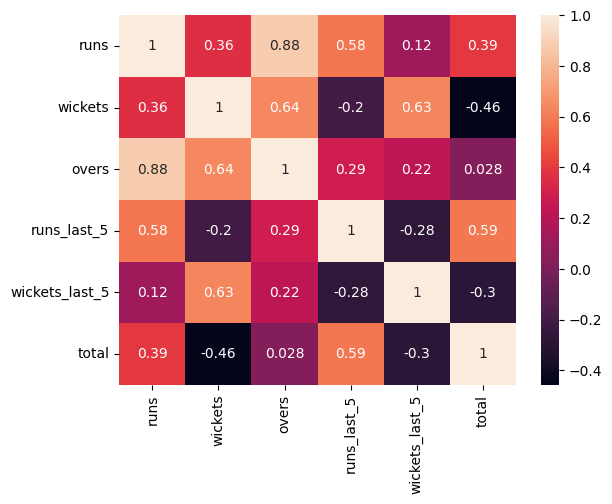

In [104]:
from seaborn import heatmap

numeric_df = ipl_df.select_dtypes(include=['number'])

heatmap(data=numeric_df.corr(), annot=True)

<h4>Data Preprocessing and Encoding</h4>

In [105]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
    ipl_df[col] = le.fit_transform(ipl_df[col])

ipl_df.head(5)

bat_team  bowl_team  runs  wickets  overs  runs_last_5  wickets_last_5  \
32         3          6    61        0    5.1           59               0   
33         3          6    61        1    5.2           59               1   
34         3          6    61        1    5.3           59               1   
35         3          6    61        1    5.4           59               1   
36         3          6    61        1    5.5           58               1   

    total  
32    222  
33    222  
34    222  
35    222  
36    222

<h4>Performing OneHotEncoding and Column Transformation</h4>

In [106]:
from sklearn.compose import ColumnTransformer
ColumnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')

In [107]:
ipl_df = np.array(ColumnTransformer.fit_transform(ipl_df))

In [108]:
cols = [
    'batting_team_Chennai Super Kings', 
    'batting_team_Delhi Daredevils',
    'batting_team_Kings XI Punjab', 
    'batting_team_Kolkata Knight Riders',
    'batting_team_Mumbai Indians', 
    'batting_team_Rajasthan Royals', 
    'batting_team_Royal Challengers Banglore', 
    'batting_team_Sunrisers Hyderabad',
    'bowling_team_Chennai Super Kings', 
    'bowling_team_Delhi Daredevils', 
    'bowling_team_Kings XI Punjab', 
    'bowling_team_Kolkata Knight Riders',
    'bowling_team_Mumbai Indians', 
    'bowling_team_Rajasthan Royals', 
    'bowling_team_Royal Challengers Banglore', 
    'bowling_team_Sunrisers Hyderabad',
    'runs', 
    'wickets', 
    'overs', 
    'runs_last_5', 
    'wickets_last_5', 
    'total'
]


df = pd.DataFrame(ipl_df, columns = cols)

<h4>Model Building</h4>

<h5>Train-Test Splitting</h5>

In [109]:
features = df.drop(['total'], axis = 1)
labels = df['total']

In [110]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, shuffle=True)
print('Training Set', train_features.shape)
print('Test Set', test_features.shape)

Training Set (32086, 21)
Test Set (8022, 21)


<h4>ML Algorithms</h4>


<h5>Decision Tree Regressor</h5>

In [111]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(train_features, train_labels)

DecisionTreeRegressor()

<h5>Model Evaluation - Decision Regressor</h5>

In [112]:
 from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, root_mean_squared_error as rmse
print("Mean Squared Error is: ", mse(test_labels, dt.predict(test_features)))
print("Mean Absolute Error is: ", mae(test_labels, dt.predict(test_features)))
print("Root Mean Squared Error is: ", rmse(test_labels, dt.predict(test_features)))



Mean Squared Error is:  118.34972575417602
Mean Absolute Error is:  3.9152331089503862
Root Mean Squared Error is:  10.878866014166


<h5>Linear Regression</h5>

In [113]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_features, train_labels)

LinearRegression()

<h5>Model Evaluation - Linear Regression</h5>

In [114]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, root_mean_squared_error as rmse
print("Mean Squared Error is: ", mse(test_labels, lr.predict(test_features)))
print("Mean Absolute Error is: ", mae(test_labels, lr.predict(test_features)))
print("Root Mean Squared Error is: ", rmse(test_labels, lr.predict(test_features)))

Mean Squared Error is:  295.51524559685754
Mean Absolute Error is:  12.924743119750763
Root Mean Squared Error is:  17.19055687279669


<h5> Random Forest Regressor </h5>

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_features, train_labels)

RandomForestRegressor()

<h5>Model Evaluation - Random Forest Regressor</h5>

In [116]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, root_mean_squared_error as rmse
print("Mean Squared Error is: ", mse(test_labels, rf.predict(test_features)))
print("Mean Absolute Error is: ", mae(test_labels, rf.predict(test_features)))
print("Root Mean Squared Error is: ", rmse(test_labels, rf.predict(test_features)))

Mean Squared Error is:  53.69977401168393
Mean Absolute Error is:  4.390511358644679
Root Mean Squared Error is:  7.328012964759542


<h5>Support Vector Regressor (SVM)</h5>

In [117]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(train_features, train_labels)

SVR()

<h5>Model Evaluation - Support Vector Regressor</h5>

In [ ]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, root_mean_squared_error as rmse
print("Mean Squared Error is: ", mse(test_labels, svr.predict(test_features)))
print("Mean Absolute Error is: ", mae(test_labels, svr.predict(test_features)))
print("Root Mean Squared Error is: ", rmse(test_labels, svr.predict(test_features)))

Mean Squared Error is:  371.366525007332
Mean Absolute Error is:  14.530776652011014


<h5>XGBoost</h5>

In [66]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_features, train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<h5>Model Evaluation - XGBoost Regressor</h5>


In [67]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, root_mean_squared_error as rmse
print("Mean Squared Error is: ", mse(test_labels, xgb.predict(test_features)))
print("Mean Absolute Error is: ", mae(test_labels, xgb.predict(test_features)))
print("Root Mean Squared Error is: ", rmse(test_labels, xgb.predict(test_features)))

Mean Squared Error is:  130.3546360135664
Mean Absolute Error is:  8.227186928185345
Root Mean Squared Error is:  11.417295477194518


<h4>Predictions</h4>

In [75]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model = rf):
    prediction_array = []

    # Batting Team 
    if batting_team == 'Chennai Super Kings':
        prediction_array = prediction_array + [1, 0, 0, 0, 0, 0, 0, 0]
    elif batting_team == 'Delhi Daredevils':
        prediction_array = prediction_array + [0, 1, 0, 0, 0, 0, 0, 0]
    elif batting_team == 'Kings XI Punjab':
        prediction_array = prediction_array + [0, 0, 1, 0, 0, 0, 0, 0]
    elif batting_team == 'Kolkata Knight Riders':
        prediction_array = prediction_array + [0, 0, 0, 1, 0, 0, 0, 0]
    elif batting_team == 'Mumbai Indians':
        prediction_array = prediction_array + [0, 0, 0, 0, 1, 0, 0, 0]
    elif batting_team == 'Rajasthan Royals':
        prediction_array = prediction_array + [0, 1, 0, 0, 0, 1, 0, 0]
    elif batting_team == 'Royal Challengers Banglore':
        prediction_array = prediction_array + [0, 0, 0, 0, 0, 0, 1, 0]
    elif batting_team == 'Sunrisers Hyderabad':
        prediction_array = prediction_array + [0, 0, 0, 0, 0, 0, 0, 1]

     # Bowling Team
    if bowling_team == 'Chennai Super Kings':
        prediction_array = prediction_array + [1, 0, 0, 0, 0, 0, 0, 0]
    elif bowling_team == 'Delhi Daredevils':
        prediction_array = prediction_array + [0, 1, 0, 0, 0, 0, 0, 0]
    elif bowling_team == 'Kings XI Punjab':
        prediction_array = prediction_array + [0, 0, 1, 0, 0, 0, 0, 0]
    elif bowling_team == 'Kolkata Knight Riders':
        prediction_array = prediction_array + [0, 0, 0, 1, 0, 0, 0, 0]
    elif bowling_team == 'Mumbai Indians':
        prediction_array = prediction_array + [0, 0, 0, 0, 1, 0, 0, 0]
    elif bowling_team == 'Rajasthan Royals':
        prediction_array = prediction_array + [0, 1, 0, 0, 0, 1, 0, 0]
    elif bowling_team == 'Royal Challengers Banglore':
        prediction_array = prediction_array + [0, 0, 0, 0, 0, 0, 1, 0]
    elif bowling_team == 'Sunrisers Hyderabad':
        prediction_array = prediction_array + [0, 0, 0, 0, 0, 0, 0, 1]

    prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
    prediction_array = np.array([prediction_array])
    pred = rf.predict(prediction_array)
    return int(round(pred[0]))

<h5>Test 1</h5>

- Batting Team: Delhi Daredevils

- Bowling Team: Chennai Super Kings

- Final Score: 147/9

In [76]:
batting_team = 'Delhi Daredevils'
bowling_team = 'Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs = 10.2, runs = 68, wickets=3, runs_last_5=29, wickets_last_5=1)
print('Prediced Score: ', score)
print('Actual Score: 147')

Prediced Score:  149
Actual Score: 147


c:\Users\91981\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<h5>Test 2</h5>

- Batting Team: Mumbai Indians

- Bowling Team: Kings XI Punjab

- Final Score: 176/7

In [77]:
batting_team = 'Mumbai Indians'
bowling_team = 'Kings XI Punjab'
score = score_predict(batting_team, bowling_team, overs = 12.3, runs = 113, wickets = 2, runs_last_5 = 55, wickets_last_5 = 0)
print('Predicted Score', score)
print('Actual Score: 176')

Predicted Score 185
Actual Score: 176


c:\Users\91981\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<h5>Test 3</h5>

- Batting Team: Kings XI Punjab

- Bowling Team: Rajasthan Royals

- Final Score: 176/7

In [79]:
batting_team = 'Kings XI Punjab'
bowling_team = 'Rajasthan Royals'
score = score_predict(batting_team, bowling_team, overs = 14.0, runs = 118, wickets = 1, runs_last_5 = 45, wickets_last_5 = 0)
print('Predicted Score: ', score)
print('Actual Score: 182')

Predicted Score:  184
Actual Score: 182


c:\Users\91981\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<h5>Test 4</h5>

- Batting Team: Kolkata Knight Riders

- Bowling Team: Chennai Super Kings

- Final Score: 172/5

In [81]:
batting_team = 'Kolkata Knight Riders'
bowling_team = 'Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs = 18.0, runs = 150, wickets = 4, runs_last_5 = 57, wickets_last_5 = 1)
print('Predicted Score: ', score)
print('Actual Score: 172')


Predicted Score:  174
Actual Score: 172


c:\Users\91981\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<h5>Test 5</h5>

- Batting Team: Delhi Daredevils

- Bowling Team: Mumbai Indians

- Final Score: 110/7

In [82]:
batting_team = 'Delhi Daredevils'
bowling_team = 'Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs = 18.0, runs = 96, wickets = 8, runs_last_5 = 18, wickets_last_5 = 4)
print('Predicted Score: ', score)
print('Actual Score: 110')

Predicted Score:  109
Actual Score: 110


c:\Users\91981\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<h5>Test 6</h5>

- Batting Team: Kings XI Punjab

- Bowling Team: Chennai Super Kings

- Final Score: 153/9

In [83]:
batting_team = 'Kings XI Punjab'
bowling_team = 'Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs = 18.0, runs = 129, wickets = 6, runs_last_5 = 34, wickets_last_5 = 2)
print('Predicted Score: ', score)
print('Actual Score: 153')

Predicted Score:  147
Actual Score: 153


c:\Users\91981\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<h5>Test 7</h5>

- Batting Team: Sunrisers Hyderabad

- Bowling Team: Royal Challengers Banglore

- Final Score: 146/10

In [84]:
batting_team = 'Sunrisers Hyderabad'
bowling_team = 'Royal Challengers Banglore'
score = score_predict(batting_team, bowling_team, overs = 18.0, runs = 129, wickets = 6, runs_last_5 = 34, wickets_last_5 = 2)
print('Predicted Score: ', score)
print('Actual Score: 146')

Predicted Score:  148
Actual Score: 146


c:\Users\91981\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<h4>Export Model</h4>

In [87]:
import pickle
filename = 'ipl_score_prediction.pkl'
pickle.dump(rf, open(filename, 'wb'))